# Описание задачи

Данные были взяты с соревнования ods, которое закончилось пару месяцев назад (https://ods.ai/competitions/learning-analytics)

Я взял датафреймы train и comp_portrait и поставил задачу предсказания наличия у студента задолженности (по конкретной дисциплине в конкретный семестр) на основе имеющейся о нём информации непосредственно в момент поступления в вуз. 

Таким образом, target является бинарным признаком (1 - есть задолженность, 0 - нет задолженностей), и мы будем решать задачу бинарной классификации 

# Импорт библиотек

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Считывание данных

## train.csv

In [124]:
train = pd.read_csv('train.csv')
train.head()

,ISU,ST_YEAR,SEMESTER,DISC_ID,TYPE_NAME,DEBT
0,17623928044460629977,2020,1,10502311854018326223,Зачет,0
1,17623928044460629977,2020,1,1601392918367593206,Зачет,0
2,17623928044460629977,2020,1,9559803959325174929,Зачет,0
3,17623928044460629977,2020,1,8955667882044263414,Зачет,0
4,17623928044460629977,2020,1,17741967398854095262,Экзамен,0


Таргет для обучения с оценками и количеством долгов студентов

- ISU - UID студента
- SEMESTER - семестр получения оценки
- DISC_ID - UID дисциплины
- DEBT - факт наличия долга (0 - отсутствие, 1 - наличие) - таргет

## comp_portrait.csv

In [125]:
comp_portrait = pd.read_csv('comp_portrait.csv')
comp_portrait.head()

,ISU,GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID
0,8746993777733478780,Ж,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,88.0,91.0,81.0,ЕГЭ,4877310761925081124
1,18279003839105282485,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,84.0,89.0,96.0,ЕГЭ,4877310761925081124
2,17601399077733331421,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,66.0,78.0,93.0,ЕГЭ,4877310761925081124
3,4111128904589594590,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,100.0,89.0,80.0,ЕГЭ,4877310761925081124
4,5943608672516320930,М,15601729049989747827,ВИ,70786669040476600,5533732657842394915,8388269026169219461,84.0,86.0,91.0,ЕГЭ,4877310761925081124


- ISU - UID студента
- GENDER - пол
- CITIZENSHIP - гражданство
- EXAM_TYPE - форма зачисления (ЕГЭ, олимпиада, ВИ - вступительные испытания)
- EXAM_SUBJECT_1 - первый экзамен ЕГЭ
- EXAM_SUBJECT_2 - второй экзамен ЕГЭ
- EXAM_SUBJECT_3 - третий экзамен ЕГЭ
- ADMITTED_EXAM_1 - баллы за 1 экзамен ЕГЭ
- ADMITTED_EXAM_2 - баллы за 2 экзамен ЕГЭ
- ADMITTED_EXAM_3 - баллы за 3 экзамен ЕГЭ
- ADMITTED_SUBJECT_PRIZE_LEVEL - уровень олимпиады (если есть)
- REGION_ID - номер региона

## Объединение датафреймов

In [126]:
df = pd.merge(train, comp_portrait, on='ISU')

df.head()

,ISU,ST_YEAR,SEMESTER,DISC_ID,TYPE_NAME,DEBT,GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID
0,17623928044460629977,2020,1,10502311854018326223,Зачет,0,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78.0,79.0,91.0,ЕГЭ,7805492244297918082
1,17623928044460629977,2020,1,1601392918367593206,Зачет,0,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78.0,79.0,91.0,ЕГЭ,7805492244297918082
2,17623928044460629977,2020,1,9559803959325174929,Зачет,0,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78.0,79.0,91.0,ЕГЭ,7805492244297918082
3,17623928044460629977,2020,1,8955667882044263414,Зачет,0,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78.0,79.0,91.0,ЕГЭ,7805492244297918082
4,17623928044460629977,2020,1,17741967398854095262,Экзамен,0,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78.0,79.0,91.0,ЕГЭ,7805492244297918082


 # Знакомство с датафреймом + преобразования признаков

## Основная информация

Размер датафрейма

In [127]:
df.shape

(178899, 17)

Общая сводка

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178899 entries, 0 to 178898
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ISU                           178899 non-null  uint64 
 1   ST_YEAR                       178899 non-null  int64  
 2   SEMESTER                      178899 non-null  int64  
 3   DISC_ID                       178899 non-null  uint64 
 4   TYPE_NAME                     178899 non-null  object 
 5   DEBT                          178899 non-null  int64  
 6   GENDER                        178899 non-null  object 
 7   CITIZENSHIP                   178899 non-null  uint64 
 8   EXAM_TYPE                     178899 non-null  object 
 9   EXAM_SUBJECT_1                178899 non-null  uint64 
 10  EXAM_SUBJECT_2                178899 non-null  uint64 
 11  EXAM_SUBJECT_3                178899 non-null  uint64 
 12  ADMITTED_EXAM_1               149985 non-nul

## Заполнение пропусков

Пропущенные значения (более наглядно)

In [129]:
df.isna().sum()

ISU                                 0
ST_YEAR                             0
SEMESTER                            0
DISC_ID                             0
TYPE_NAME                           0
DEBT                                0
GENDER                              0
CITIZENSHIP                         0
EXAM_TYPE                           0
EXAM_SUBJECT_1                      0
EXAM_SUBJECT_2                      0
EXAM_SUBJECT_3                      0
ADMITTED_EXAM_1                 28914
ADMITTED_EXAM_2                 28914
ADMITTED_EXAM_3                 28914
ADMITTED_SUBJECT_PRIZE_LEVEL        0
REGION_ID                           0
dtype: int64

Видим, что есть пропуски в столбцах типа float. Заметим, что их значения - баллы за егэ, которые, вообще говоря, не могут быть дробными. Поэтому возьмём в качестве заполнителя медиану по всем значениям.

In [130]:
df.ADMITTED_EXAM_1  = df.ADMITTED_EXAM_1 .fillna(df.ADMITTED_EXAM_1.median())
df.ADMITTED_EXAM_2  = df.ADMITTED_EXAM_2.fillna(df.ADMITTED_EXAM_2.median())
df.ADMITTED_EXAM_3  = df.ADMITTED_EXAM_3 .fillna(df.ADMITTED_EXAM_3.median())

## Изменение типов столбцов

Признаки DISC_ID, TYPE_NAME, GENDER, CITIZENSHIP, EXAM_TYPE, EXAM_SUBJECT_1, EXAM_SUBJECT_2, EXAM_SUBJECT_3, ADMITTED_SUBJECT_PRIZE_LEVEL, REGION_ID являются категориальными. Приведем их к категориальному типу

In [131]:
for col in ['DISC_ID', 'TYPE_NAME', 'GENDER', 'CITIZENSHIP', 
            'EXAM_TYPE', 'EXAM_SUBJECT_1', 'EXAM_SUBJECT_2', 
            'EXAM_SUBJECT_3', 'ADMITTED_SUBJECT_PRIZE_LEVEL', 'REGION_ID']:
    
    df[col] = df[col].astype('category')

Посмотрим описательные статистики по float столбцам

In [132]:
df.describe(include=["float64"])

,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3
count,178899.000000,178899.000000,178899.000000
mean,80.254406,82.561149,87.092018
std,9.432596,15.055835,8.857600
min,0.000000,0.000000,0.000000
25%,74.000000,79.000000,82.000000
50%,80.000000,84.000000,89.000000
75%,86.000000,91.000000,94.000000
max,100.000000,100.000000,100.000000


Посмотрим описательные статистики по category столбцам

In [133]:
df.describe(include="category")

,DISC_ID,TYPE_NAME,GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID
count,178899,178899,178899,178899,178899,178899,178899,178899,178899,178899
unique,949,4,2,11,3,6,8,6,6,85
top,9028324525774925341,Зачет,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,ЕГЭ,4877310761925081124
freq,11535,89404,121886,172308,142915,177126,128505,170807,137781,58807


# Exploratory data analysis

## Target

Посмотрим распределение целевой переменной

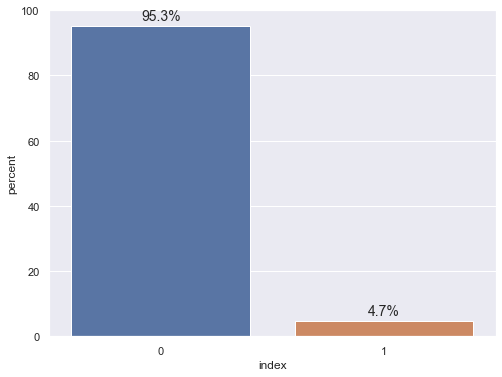

In [134]:
rcParams['figure.figsize'] = 8, 6

# Функция, добавляющая подпись процентов на график barplot
def plot_text(ax):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            # координата xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # центрирование
            ha='center',
            va='center',
            xytext=(0, 10),
            # точка смещения относительно координаты
            textcoords='offset points',
            fontsize=14)
        
# Датафрейм частот значений      
norm_target = pd.DataFrame(df['DEBT'].value_counts(normalize=True).mul(100)\
                           .rename('percent')).reset_index()

ax = sns.barplot(x='index', y='percent', data=norm_target)
plot_text(ax)

Видим сильный дисбаланс классов, это нужно будет учесть при обучении алгоритма

Придумаем ряд гипотез, которые помогут нам лучше понять данные, и сразу же их проверим

## 1 гипотеза

Доля задолженностей у мужчин больше, чем у женщин (иными словами, вероятность того, что случайно выбранный объект с gender='М' будет принадлежать целевому классу больше вероятности того, что случайно выбранный объект с gender='Ж' будет принадлежать целевому классу)

<Figure size 864x5760 with 0 Axes>

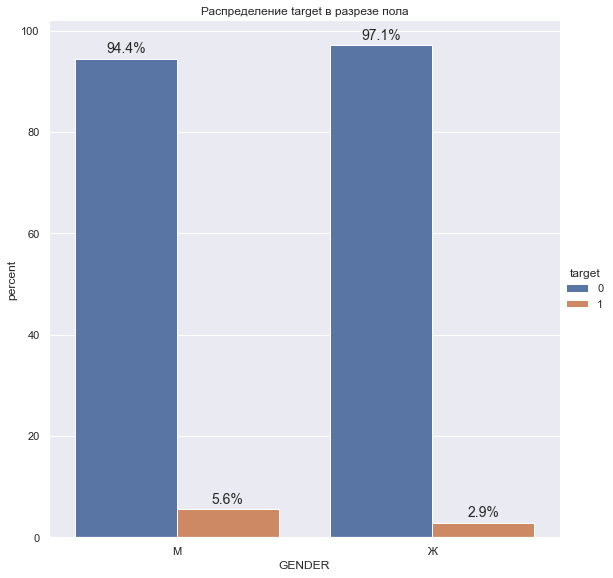

In [135]:
fig = plt.gcf()
fig.set_size_inches(12, 80)

rcParams['figure.figsize'] = 8, 6

temp_df_1 = df[df['GENDER']=='М']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_1['GENDER'] = ['М'] * len(temp_df_1)

temp_df_2 = df[df['GENDER']=='Ж']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_2['GENDER'] = ['Ж'] * len(temp_df_2)


target_values = pd.concat([temp_df_1, temp_df_2])
target_values.rename(columns={"index": "target"}, inplace=True)
target_values['percent']=target_values['percent']*100
          
g = sns.catplot(x='GENDER', y='percent', hue='target', data=target_values, kind='bar', height=8)
plt.title('Распределение target в разрезе пола')

plot_text(g.ax);

Видим, что доля попыток, закончившихся задолженностью у мужчин почти в 2 раза больше, чем у женщин. Гипотеза подтвердилась, и можно сделать вывод, что пол является важным признаком в нашей задаче

## 2 гипотеза

Доля задолженностей у олимпиадников меньше, чем у тех, кто сдавал ЕГЭ или вступительные испытания.

Это выглядит здравым предположением, так как задачи олимпиад обычно сложнее, и победители должны потратить на них много времени, параллельно готовясь к ЕГЭ/ ВИ. Даже людей, просто участвующих в олимпиадах обычно не очень много, и сложно представить, что те, кто в них побеждают, могут иметь плохие оценки в вузе

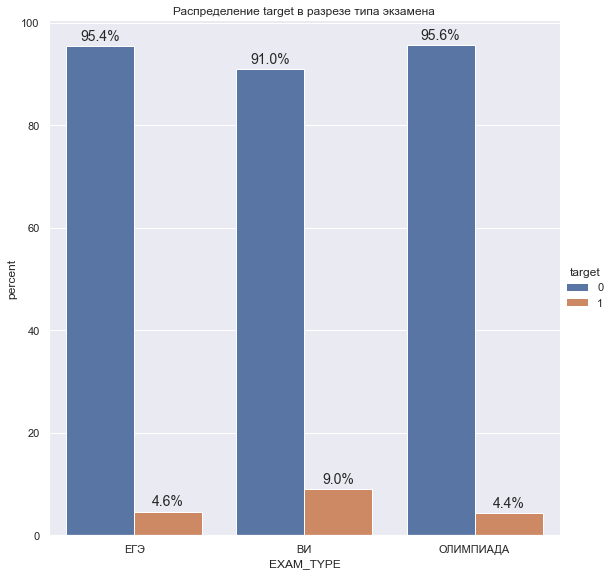

In [136]:
temp_df_1 = df[df['EXAM_TYPE']=='ЕГЭ']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_1['EXAM_TYPE'] = ['ЕГЭ'] * len(temp_df_1)

temp_df_2 = df[df['EXAM_TYPE']=='ВИ']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_2['EXAM_TYPE'] = ['ВИ'] * len(temp_df_1)

temp_df_3 = df[df['EXAM_TYPE']=='ОЛИМПИАДА']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_3['EXAM_TYPE'] = ['ОЛИМПИАДА'] * len(temp_df_1)

target_values = pd.concat([temp_df_1, temp_df_2, temp_df_3])
target_values.rename(columns={"index": "target"}, inplace=True)
target_values['percent']=target_values['percent']*100
          
g = sns.catplot(x='EXAM_TYPE', y='percent', hue='target', data=target_values, kind='bar', height=8)
plt.title('Распределение target в разрезе типа экзамена')

plot_text(g.ax);

Вторая гипотеза тоже подтвердилась - видим, что олимпиадники более успешны относительно других каст, хоть они и обогнали сдающих ЕГЭ всего на 0.2%. При этом, у людей, поступающих по вступительным испытаниям, доля неудач значительно выше

## 3 гипотеза

На экзаменах неудачи случаются чаще, чем на зачётах/диф. зачётах/при сдаче курсовых проектов

Экзамены в вузе, как правило, сложнее зачётов, и их нельзя сдавать много раз. Причём, в некоторых местах, если студент не сдал определённое кол-во зачётов, то к экзаменам его тоже не допустят. Аналогично, с курсовыми проектами - человек, не закрывший курсовую, автоматически получает 2 за экзамен. Поэтому логично предположить, что доля задолженностей выше для экзаменов, чем для других форм отчётности

In [137]:
df['TYPE_NAME'].unique()

['Зачет', 'Экзамен', 'Курсовой проект', 'Дифференцированный зачет']
Categories (4, object): ['Дифференцированный зачет', 'Зачет', 'Курсовой проект', 'Экзамен']

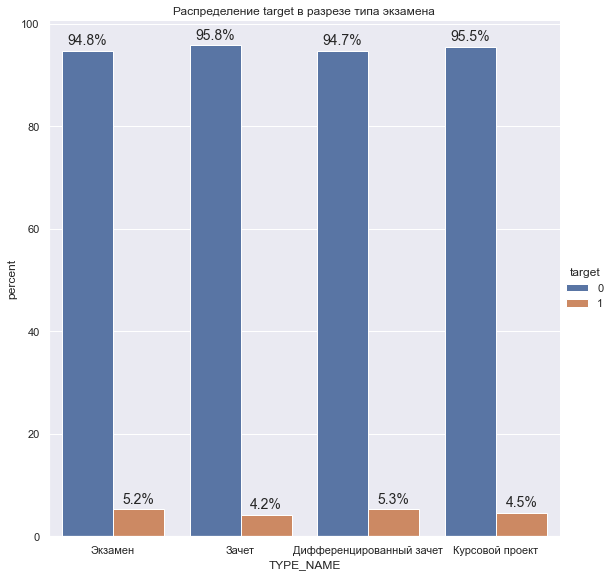

In [138]:
temp_df_1 = df[df['TYPE_NAME']=='Экзамен']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_1['TYPE_NAME'] = ['Экзамен'] * len(temp_df_1)

temp_df_2 = df[df['TYPE_NAME']=='Зачет']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_2['TYPE_NAME'] = ['Зачет'] * len(temp_df_2)

temp_df_3 = df[df['TYPE_NAME']=='Дифференцированный зачет']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_3['TYPE_NAME'] = ['Дифференцированный зачет'] * len(temp_df_3)
               
temp_df_4 = df[df['TYPE_NAME']=='Курсовой проект']['DEBT']\
                .value_counts(normalize=True).rename('percent').reset_index()
temp_df_4['TYPE_NAME'] = ['Курсовой проект'] * len(temp_df_4)
               

target_values = pd.concat([temp_df_1, temp_df_2, temp_df_3, temp_df_4])
target_values.rename(columns={"index": "target"}, inplace=True)
target_values['percent']=target_values['percent']*100
          
g = sns.catplot(x='TYPE_NAME', y='percent', hue='target',
                data=target_values, kind='bar', height=8)
plt.title('Распределение target в разрезе типа экзамена')

plot_text(g.ax);

Гипотеза не подтвердилась - видим, что наиболее проблемными являются диф. зачёты, хотя экзамены обогнали их всего на 0.1%. При этом менее проблемными являются курсовые проекты, и уже после них обычные зачёты

## 4 гипотеза

Вероятность наличия задолженности обратно пропорциональна среднему баллу поступления. Иными словами, в разрезе target распределения среднего балла отличаются, при этом распределение для строк, соответствующих успешной попытке, должно быть смещено вправо (т.е. в сторону максимального балла)

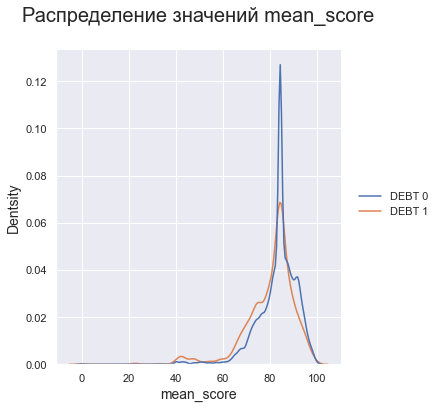

In [139]:
# Сформируем столбец среднего балла
df['mean_score'] = (df['ADMITTED_EXAM_1'] + df['ADMITTED_EXAM_2'] + df['ADMITTED_EXAM_3'])/3

sns.displot(
    data={
        "DEBT 0": df[df.DEBT == 0]['mean_score'],
        "DEBT 1": df[df.DEBT == 1]['mean_score']
    },
    kind="kde",
    common_norm=False,  
)

plt.title('Распределение значений mean_score\n', fontsize=20)
plt.xlabel('mean_score', fontsize=14)
plt.ylabel('Dentsity', fontsize=14);

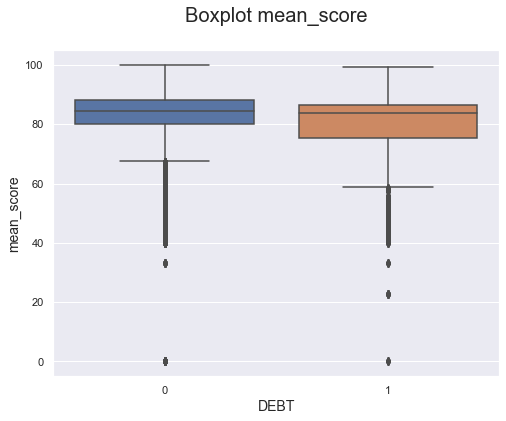

In [140]:
sns.boxplot(x='DEBT', y='mean_score', data=df)

plt.title('Boxplot mean_score\n', fontsize=20)
plt.ylabel('mean_score', fontsize=14)
plt.xlabel('DEBT', fontsize=14);

Гипотеза в принципе подтвердилась - по первому графику видно, что синее распределение смещено вправо. Это значит, что попытки, заканчивающиеся задолженностью, чаще приходятся на людей, имеющих меньшие баллы при поступлении. Боксплот также демонстрирует смещение статистик, хоть и не очень сильное

# Вывод и сохранение датафрейма

В целом, данные выглядят хорошо. Все признаки, которые мы исследовали, имеют какую-то связь с таргетом, а значит, будут полезными при обучении моделей

Хоть в соревновании, из которого взяты датафреймы, решение оценивают по метрике f1, мы, как вольные художники, будем ориентироваться на roc_auc. Это тот критерий качества, на который я бы смотрел в реальной жизни, т.к. мне очень сложно представить ситуацию, в которой нам бы понадобилось предсказывать задолженности с той же эффективностью, что и их отсутствие. Скорее, нам важно как более полно найти целевой класс, чтобы как-то с ним поработать (в зависимости от проекта - предложить психологическую помощь, сделать рассылку на смену направления и т.д. Это примеры задач, для которых более критичным является пропуск объекта целевого класса, чем ошибочное отнесение нецелевого к целевому)

Выполним финальное преобразование - удалим признаки  'ISU' и 'ST_YEAR', так как мы не знаем их на новых данных, следовательно и при обучении они нам не понадобятся, после чего сохраним датафрейм для дальнейшего использования

In [141]:
df.drop(columns=['ISU', 'ST_YEAR'], inplace=True)

Сохраним в формате pickle, чтобы не терять типы столбцов

In [142]:
df.to_pickle('data.pickle')